In [20]:
from mitwelten_data import PollinatorCat, get_pollinator_detections, get_pollinator_tod
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime

In [2]:
CATEGORY = PollinatorCat.all
CONFIDENCE = 0.8
BUCKET_WIDTH = "1d"
TIME_FROM = datetime(2021, 5, 1).isoformat()
TIME_TO = datetime(2021, 9, 1).isoformat()

In [3]:
pollidet = get_pollinator_detections(CATEGORY,CONFIDENCE,BUCKET_WIDTH,TIME_FROM,TIME_TO)

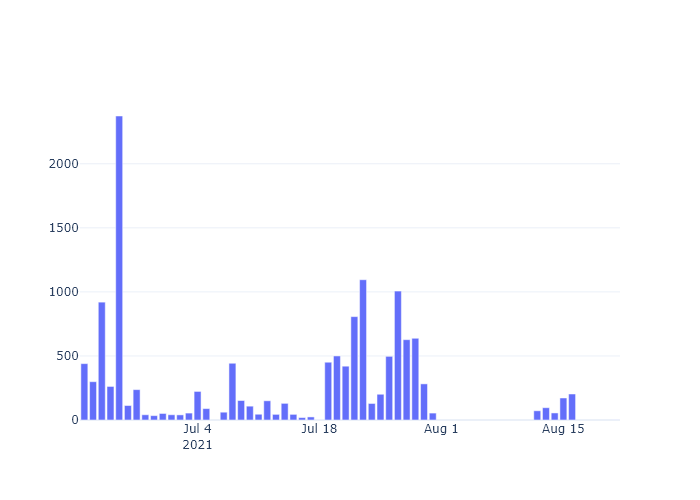

In [4]:
fig = go.Figure(layout=dict(template="plotly_white"))
fig.add_trace(go.Bar(x=pollidet.timestamps,y=pollidet.values))
fig.show("png")

In [14]:
tod = get_pollinator_tod(CATEGORY,CONFIDENCE,bucket_width_m=15)

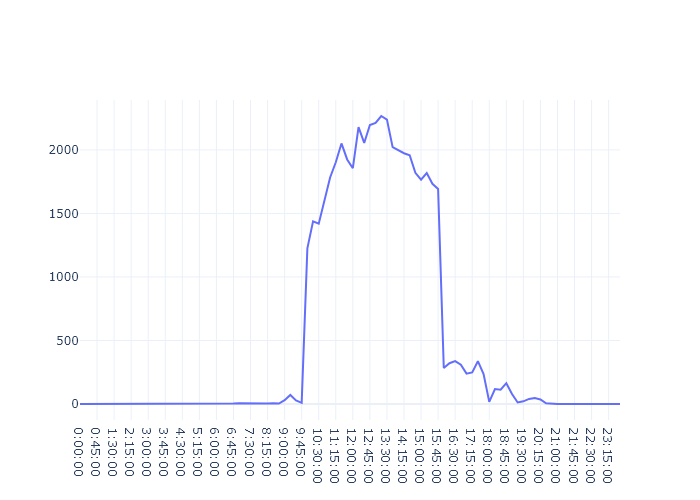

In [17]:
fig = go.Figure(layout=dict(template="plotly_white"))
fig.add_trace(go.Scatter(x=tod.formatted_time,y=tod.values))
fig.show("png")

In [29]:
tod_apis = get_pollinator_tod(PollinatorCat.apis,CONFIDENCE,bucket_width_m=30)
tod_bombus = get_pollinator_tod(PollinatorCat.bombus, CONFIDENCE,bucket_width_m=30)


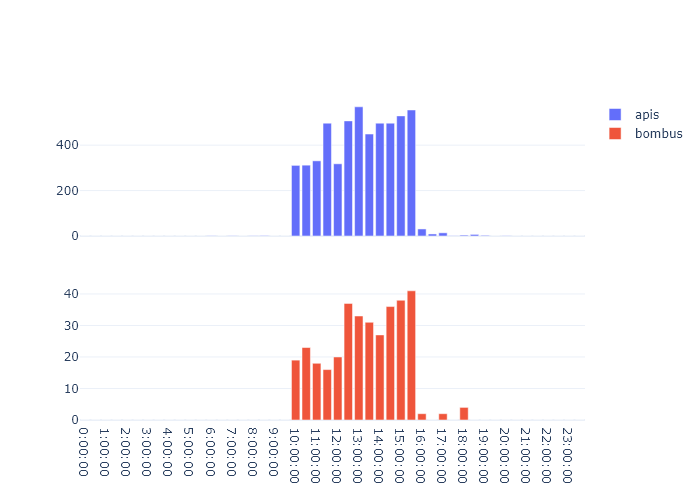

In [36]:
fig = make_subplots( rows=2,cols=1, shared_xaxes=True)
fig.add_trace(go.Bar(x=tod_apis.formatted_time,y=tod_apis.values, name="apis"), row=1,col=1)
fig.add_trace(go.Bar(x=tod_bombus.formatted_time,y=tod_bombus.values, name="bombus"),row=2,col=1)
fig.update_layout(template="plotly_white")
fig.show("png")